In [12]:
#pip install kneed

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sea
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [8]:
df = pd.read_csv('Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [11]:
gender = df['Gender']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


C:\Users\mdelan02\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

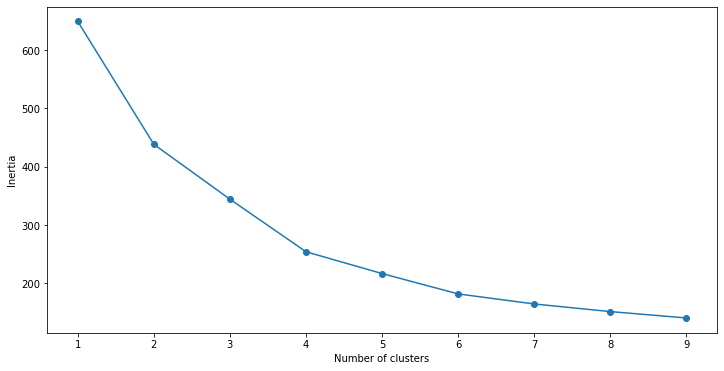

In [14]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
#plotting to find the elbow of the figure which is the optimal # of clusters

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [24]:
#function to find knees if visual is difficult
kneecheck = KneeLocator(frame['Cluster'],frame['SSE'],curve ='convex',direction='decreasing')

kneecheck.knee

4

In [101]:
#Finding the silhouette score
newdf = newdf.drop(['label'], axis=1, errors='ignore')
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

#print the silhouette score of this model (-1 to 1, 1 being highest)

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


In [106]:
#get labels
newdf = newdf.drop(['label'], axis=1, errors='ignore')
clusters = kmeans.fit_predict(newdf.iloc[:,0:])
newdf["label"] = clusters

In [112]:
set(newdf['label'])

{0, 1, 2, 3}

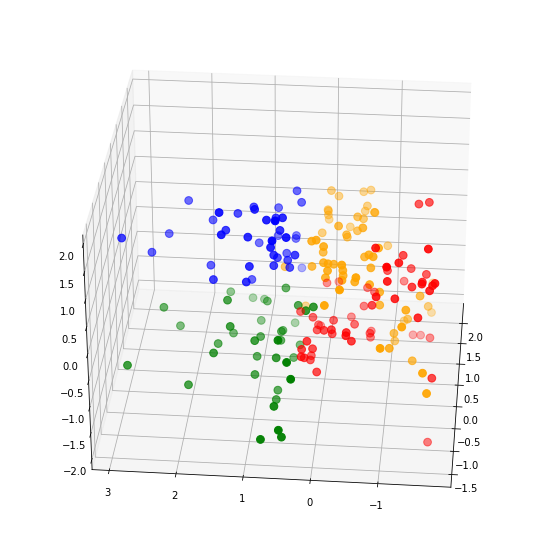

In [113]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [114]:
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,label
0,-1.738999,-1.424569,-0.434801,0,1
1,-1.738999,-1.281035,1.195704,0,1
2,-1.700830,-1.352802,-1.715913,1,1
3,-1.700830,-1.137502,1.040418,1,1
4,-1.662660,-0.563369,-0.395980,1,1


In [116]:
len(newdf.columns)

5

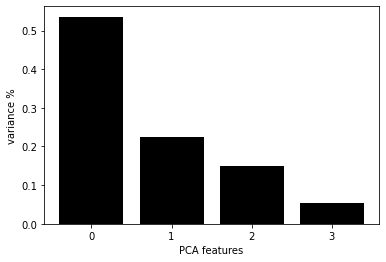

In [117]:
pca = PCA(n_components=len(newdf.columns)-1)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

C:\Users\mdelan02\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


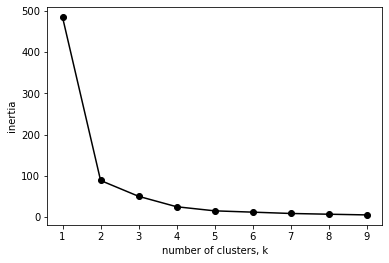

In [118]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:1])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [119]:
kneecheck = KneeLocator(frame['Cluster'],frame['SSE'],curve ='convex',direction='decreasing')

kneecheck.knee

4

In [120]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:1])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:1], model.labels_, metric='euclidean')) 

0.6146989314537686


In [123]:
#mapping clusters back to the dataset

df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

pred = model.predict(PCA_components.iloc[:,:1])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,2


In [125]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,54.159420,50.289855,37.014493
1,1,31.904762,82.476190,82.880952
2,2,25.673077,42.288462,60.403846
3,3,36.702703,80.513514,23.351351


<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

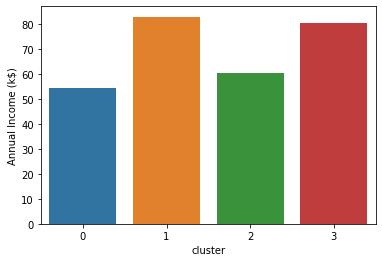

In [129]:
sns.barplot(x='cluster',y='Age',data=avg_df)
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [130]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head()

Gender
cluster Gender        
0       Female      39
        Male        30
1       Female      22
        Male        20
2       Female      32

In [ ]:
#IDEA for new additional analysis

'''
One way to tease apart the influential features this is with a Random Forest Classifier.
For example, if we have 4 clusters, we can use our existing signals to predict the probability
of everyone belonging to the first cluster, then the second, etc. The result would be K models
to match K clusters, one model per cluster, and predicting whether an instance is likely to belong
to each cluster. Most standard implementations of the Random Forest algorithm will show you which
features are important for each particular prediction, which can inspire more intuitions on what
these important features says about the cluster itself.'''